# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

## 1. Let's import the needed libraries

In [239]:
%%capture
pip install geopandas


In [240]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 2. First let's have a look at the data

> **2.1** The Denver CSV file contains all the locations of Starbucks coffees in Denver. To make this data more understandable and preview what information is included we will read it into a Pandas DataFrame and rename the DataFrame to **denver_starbucks**.

In [241]:
denver_starbucks = pd.read_csv('./data/denver.csv')
denver_starbucks.head()

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77


> **2.2** As the Neighborhoods geographical data is stored in a shape format we will use the Geopanda library to read it into a GeoDataFrame that we will call **'neighborhoods'**.

In [242]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
print(neighborhoods.shape)

neighborhoods.head()

(78, 3)


,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."


> *The neighborhoods GeoDataFrame is composed of only three columns and 78 rows, therefore we can know that Denver is composed of 78 different neighborhoods.*

> **2.3** Lastly the census data gives us a good knowledge of the demographic of the different neighborhoods, with the most important information being the age groups as well as the number of Households that have an average yearly income of more than $100K.  

In [243]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## 3. First Understandings & Data Cleaning

For the rest of the exercise we will assume that all the data available and the presented situation takes place in 2010, as our Data is based on the 2010 Census. Moreover, we can see that most of the needed information comes from the census Data where we have indications of the target audience for the new coffee shops:
1. 20- 35 Age Group
2. Affluent Households.

We can approximate the target age group of the client (20-35) to the age bracket 18-34. Moreover, we will define "affluent households" as households that have a yearly income of more than $100K.  

Therefore, we will:
1. Drop the neighborhoods that don't have any households that have a yearly income above $100K.
2. Create a new column '**ratio_18_34**' that calculates the ratio of 18-34 year olds in the neighborhood.
3. Create a new column '**ratio_affluent_hhld**' that calculates the ratio of 'affluent' households in the neighborhood.

In addition, we will also drop the columns that won't be necessary to the rest of the exercise. 

4. For the denver_starbucks DataFrame we will keep the 'Name', 'Longitude', and 'Latitude' columns. 
5. For the neighborhoods GeoDataFrame we will keep all three columns as they will serve us later to create our maps.
6. For the census DataFrame we will keep the 'NBHD_ID', 'NBHD_NAME', 'ratio_18_34', 'ratio_affluent_hhld'. 

> **3.1 Drop non-affluent household neighborhoods.**

In [244]:
affluent_hhld_neighborhoods = census.dropna(subset=['NUM_HHLD_100K+'])
print(census.shape)
print(affluent_hhld_neighborhoods.shape)

(78, 10)
(48, 10)


> We can see that dropping neighborhoods that don't have any households that have a yearly income above $100K, we managed to **reduce** the neighborhoods of Denver from 78 to **48**. This gives us a narrowed down list of potential neighborhoods.

> **3.2 Create 'ratio_18_34' column**

In [245]:
affluent_hhld_neighborhoods['18_to_34_ratio'] = affluent_hhld_neighborhoods['AGE_18_TO_34']/affluent_hhld_neighborhoods['POPULATION_2010']

affluent_hhld_neighborhoods.sort_values(by=['18_to_34_ratio'], ascending=False).head()

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18_to_34_ratio
63,64,University,9375.0,826.0,5784.0,2246.0,519.0,3759.0,1218.0,991.0,0.616960
8,9,Capitol Hill,14708.0,408.0,8274.0,5155.0,871.0,10856.0,1201.0,1223.0,0.562551
46,47,North Capitol Hill,5823.0,194.0,3238.0,1968.0,423.0,3851.0,461.0,1010.0,0.556071
58,59,Speer,10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.489410
25,26,Five Points,12712.0,1446.0,5961.0,4660.0,645.0,6406.0,1711.0,1680.0,0.468927


From this table we can see that **University, Capitol Hill, and North Capitol Hill** are the neighborhoods with the most people aged 18 to 34 compared to their overall population. This already gives us an estimation of good candidate neighborhoods. However, there is still one other criteria we want to identify, that of the ratio of affluent households.

> **3.3 Create a 'ratio_affluent_hhld' column**

To create the ratio we will take the number of households that have a yearly income of more than $100K and divide it by the number of households in that neighborhood. 
Lastly we will order the table first by the highest ratio of affluent households and then by the 18-34 year old ratio, as like stated by the client the focus was first to be close to affluent household and then focusing on the 20-35 year olds.

In [246]:
affluent_hhld_neighborhoods['ratio_affluent_hhld'] = affluent_hhld_neighborhoods['NUM_HHLD_100K+']/affluent_hhld_neighborhoods['NUM_HOUSEHOLDS']

affluent_hhld_neighborhoods = affluent_hhld_neighborhoods[['NBHD_ID', 'NBHD_NAME', '18_to_34_ratio', 'ratio_affluent_hhld']] .sort_values(by=['ratio_affluent_hhld', '18_to_34_ratio'], ascending=False)

affluent_hhld_neighborhoods.head(3)

,NBHD_ID,NBHD_NAME,18_to_34_ratio,ratio_affluent_hhld
59,60,Central Park,0.287353,0.671554
36,37,Hilltop,0.121368,0.623707
69,70,Washington Park,0.230123,0.525854


From this new table we can see that **Central Park, Hilltop, and Washington Park** are the neighborhoods with the highest concentration of affluent households with Central Park and Washington Park having more than 20% of 18-34 year olds. These would be the 3 neighborhoods the client should consider for its expansion. 

## 4. Creating Maps

Now that we found out the 3 neighborhoods lets take a look on how to visualize the best. 
- We will start by visualizing the map of Denver's different locations 
- Then adding the locations of the different Starbucks shops.
- Lastly we will visualize the three neighborhoods that respond the most to the target audience the client is after.

 > **4.1 Denver Map**
In this first stage we will visualize the map of Denver and its different neighborhoods. To do so we will use the neighborhoods GeoDataFrame as it already contains the shapes (polygons) of the different neighborhoods in the **geometry** column. 


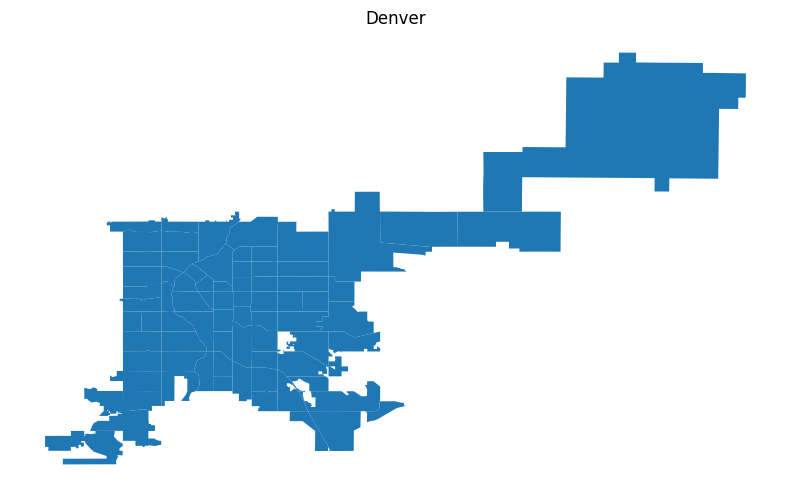

In [247]:
neighborhoods.plot(figsize=(10,6))
plt.axis('off')
plt.title('Denver')
plt.show()

This basic map shows us Denver and the light blue line show the limits of each of Denver's neighborhoods. As we now have this map we want to know where the different Starbucks shops are located in Denver. To do this we first have to set the Coordinate Reference System to the authority code EPSG: 4326, which tells GeoPandas that the coordinates are in latitude and longitude. This will make sure that when we superpose the locations of the Starbucks shops they will fall on the correct location on the map.

In [248]:
neighborhoods = neighborhoods.set_crs(epsg=4326)

 > **4.2 Starbucks Location Map**
As the starbucks locations are saved as a pandas DataFrame we first have to convert them into a GeoPandas DataFrame to be able to project it on a map. To do so we just have to pass the denver DataFrame in a GeoPandas GeoDataFrame and use geopandas *point_from_xy()* to transform the Longitude and Latitude columns into a list of shapely.point objects and set it as a geometry column. As mentioned above we will set the CRS to the same CRS of the neighborhood GeoDataFrame to make sure we can superpose the two maps correctly.

Text(0.5, 1.0, 'Starbucks shops in Denver')

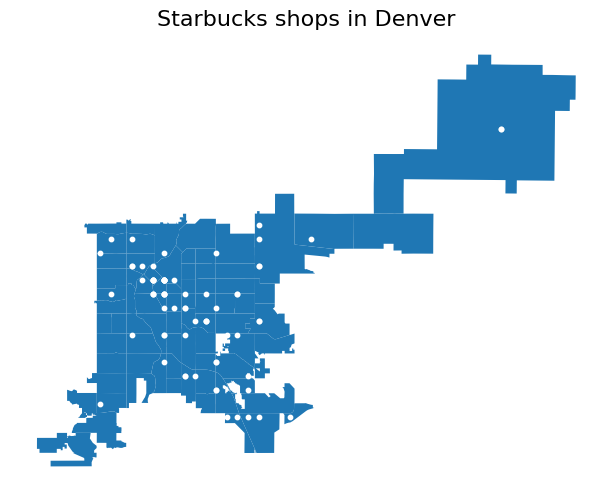

In [249]:
denver_gdf = gpd.GeoDataFrame(denver_starbucks, geometry=gpd.points_from_xy(denver_starbucks.Longitude, denver_starbucks.Latitude))

denver_gdf = denver_gdf.set_crs(neighborhoods.crs)


fig, ax = plt.subplots(figsize=(15,6))
ax.axis('off')
ax.set_aspect('equal')
base = neighborhoods.plot( ax = ax)
denver_gdf.plot(ax=base, marker='o', color='white', markersize=10)
plt.title('Starbucks shops in Denver', fontsize=16)

We can see that most Starbucks shops are located in the center of Denver with only very few on the outliers. 

> **4.3 Visualizing the neighborhoods with the heighest ratio of affluent Households**

Finally we are ready to show the neighborhoods the client needs to focus for his expansion. To be able to do this we will merge the neighborhood GeoDataFrame with the previously created DataFrame affluent_hhld_neighborhood using their common column 'NBHD_ID'. 

As we don't need all the columns in the affluent_hhld_neighborhood DataFrame we will slice it to only include the needed columns 'NBHD_ID', '18_to_34_ratio', and 'affluent_hhld_ratio' and save it into a newe DataFrame called *affluent_hhld_neighborhood_essential*. 

In [250]:
affluent_hhld_neighborhoods_essential = affluent_hhld_neighborhoods[['NBHD_ID', '18_to_34_ratio', 'ratio_affluent_hhld']]

Moreoever, as the affluent_hhld_neighborhoods DataFrame doesn't include all the neighborhoods, since we excluded the neighborhoods without any household with a yearly income of over $100k we will left merge the neighborhoods and affluent_hhld_neighborhoods DataFrames to keep all the neighborhoods on the map and replace the NaN values in the *18_to_34_ratio* and *ratio_affluent_hhld* columns to 0. 

In [251]:
neighborhoods_merged_left = neighborhoods.merge(affluent_hhld_neighborhoods_essential, how = "left", on='NBHD_ID')
neighborhoods_merged_left.fillna(0, inplace=True)
neighborhoods_merged_left.head()

,NBHD_ID,NBHD_NAME,geometry,18_to_34_ratio,ratio_affluent_hhld
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",0.000000,0.000000
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",0.000000,0.000000
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",0.000000,0.000000
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",0.230123,0.525854
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",0.369936,0.432987


Text(0.5, 1.0, 'Starbucks shops in Denver \n and most affluent Neighborhoods')

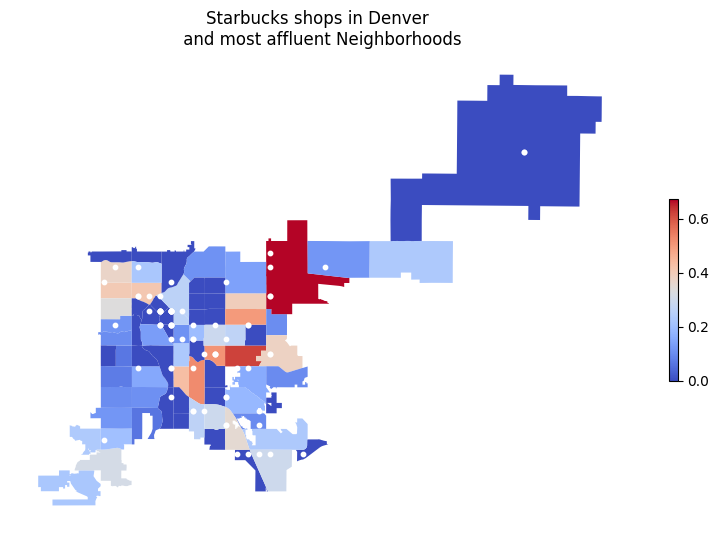

In [252]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('off')
base = neighborhoods_merged_left.plot('ratio_affluent_hhld', ax = ax, cmap='coolwarm', legend=True, legend_kwds={'shrink':0.3})
denver_gdf.plot(ax=base, marker='o', color='white', markersize=10)
plt.title('Starbucks shops in Denver \n and most affluent Neighborhoods', fontsize=12)

This map already shows us the most "affluent" neighborhoods but it still lacks some clarity as we don't know the names of the neighborhoods and the legend doesn't tell us what the colors mean. 

> **4.4 Final Map**

The previous map is not very clear therefore, we will first add the name of the 3 most affluent neighborhoods to the map. To do so we'll start by slicing the merged GeoDataFrame *neighborhoods_merged_left* by sorting by affluent household ratio and taking the first 3 results.

In [253]:
top_3_neighborhoods = neighborhoods_merged_left.sort_values(by='ratio_affluent_hhld', ascending=False).head(3)

top_3_neighborhoods

,NBHD_ID,NBHD_NAME,geometry,18_to_34_ratio,ratio_affluent_hhld
50,60,Central Park,"POLYGON ((-104.86604 39.79841, -104.86604 39.7...",0.287353,0.671554
26,37,Hilltop,"POLYGON ((-104.91024 39.71120, -104.91112 39.7...",0.121368,0.623707
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",0.230123,0.525854


Then, in order to be able to place the labels on the map we need x and y coordinates, thankfully the **centroids** function from geopandas gives us the center point of the different neighborhoods. We will use this function to first store the x coordinate in an *x* column and then the y coordinate in a *y* column. 

In [254]:
top_3_neighborhoods['x'] = top_3_neighborhoods.centroid.map(lambda p: p.x)
top_3_neighborhoods['y'] = top_3_neighborhoods.centroid.map(lambda p: p.y)

top_3_neighborhoods.head()

,NBHD_ID,NBHD_NAME,geometry,18_to_34_ratio,ratio_affluent_hhld,x,y
50,60,Central Park,"POLYGON ((-104.86604 39.79841, -104.86604 39.7...",0.287353,0.671554,-104.879112,39.776633
26,37,Hilltop,"POLYGON ((-104.91024 39.71120, -104.91112 39.7...",0.121368,0.623707,-104.924342,39.718689
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",0.230123,0.525854,-104.966267,39.701238


With this we can finally annotate the name of the three top neighborhoods on the map. 
We build a for loop to take the 'NBHD_NAME' as labels and place them using the *x* and *y* columns as coordinates.

[Text(0.5, 1.0, 'Starbucks shops in Denver \n and most affluent Neighborhoods')]

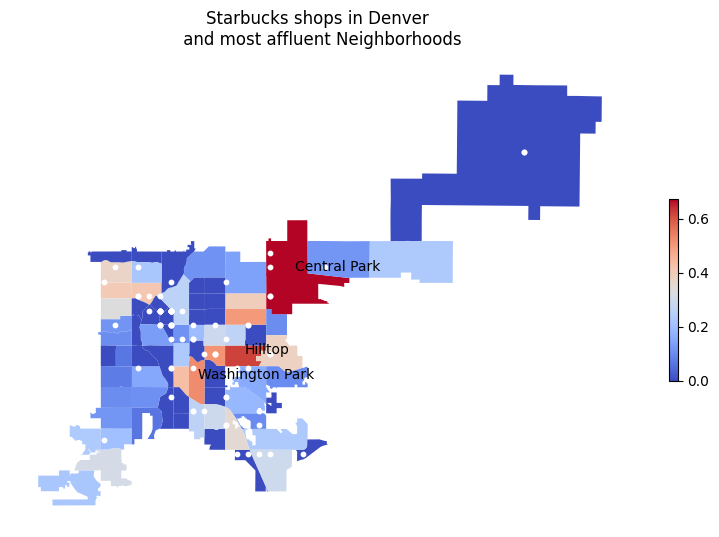

In [255]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('off')
base = neighborhoods_merged_left.plot('ratio_affluent_hhld', ax = ax, cmap='coolwarm', legend=True, legend_kwds={'shrink':0.3})
for x, y, label in zip(top_3_neighborhoods.x, top_3_neighborhoods.y, top_3_neighborhoods.NBHD_NAME):
    ax.annotate(label, xy=(x, y), xytext=(1,1), textcoords="offset points")
denver_gdf.plot(ax=base, marker='o', color='white', markersize=10)
ax.set(title='Starbucks shops in Denver \n and most affluent Neighborhoods')


However, the legend still lacks a proper title. Let's remedy to this by using the **ax.legend** argument.

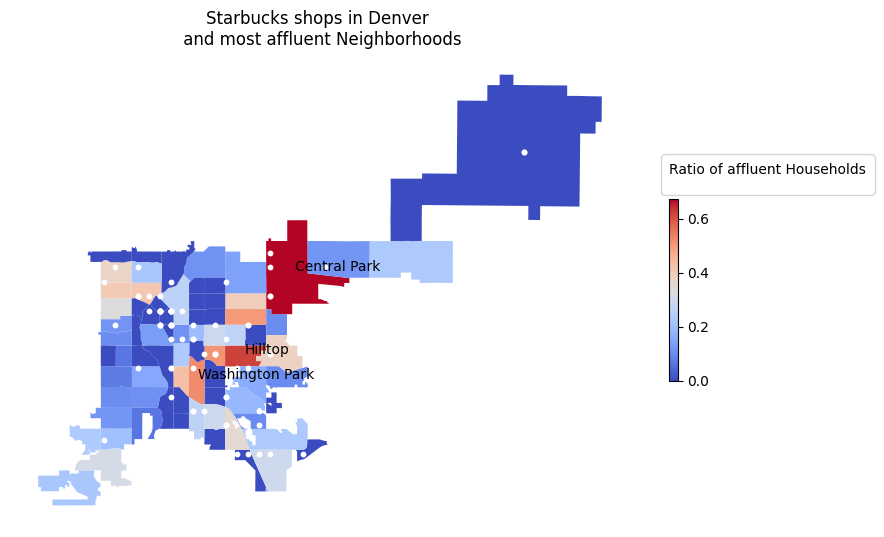

In [256]:
fig, ax = plt.subplots(figsize=(10,8))
ax.axis('off')
base = neighborhoods_merged_left.plot('ratio_affluent_hhld', ax = ax, cmap='coolwarm', legend=True, legend_kwds={'shrink':0.3})
for x, y, label in zip(top_3_neighborhoods.x, top_3_neighborhoods.y, top_3_neighborhoods.NBHD_NAME):
    ax.annotate(label, xy=(x, y), xytext=(1,1), textcoords="offset points")
denver_gdf.plot(ax=base, marker='o', color='white', markersize=10)
ax.set(title='Starbucks shops in Denver \n and most affluent Neighborhoods')

ax.legend(loc=(1.05, 0.7),
          fontsize=15,
          frameon=True,
          title="Ratio of affluent Households")

There we go!  
We now can see that **Central Park** is the most 'affluent' neighborhood and has only 3 Starbucks shops which leave ample space for the client to set-up shop.  
Moreover, **Hilltop**, the second most 'affluent' neighborhood doesn't have any Starbucks coffee shop which might indicate that the inhabitants would love to have a new coffee shop.

## 5. Conclusion

Thanks to the map and this analysis we can suggest to our client to look for locations in these three neighborhoods by descending order:

- Central Park
- Hilltop
- Washington Park

Moreover, we have additional information thanks to the location data of the Starbucks coffee shops. And in fact Hilltop doesn't have Starbucks shops and Washington Park has only one Starbucks shop, while Central Park has three Starbucks coffee shops but is the neighborhood with the highest ratio of affluent households. As both chains look for different customers this can give us a reference that these neighborhoods are more suite for the customers our client is looking for. 

## 6. Final Thoughts

This analysis is based on three main assumptions:  

- We are analyzing the population of 2010
- The target age of 20-35 years is approximated with the census data age group 18-34 years old
- Affluent households are household who earn more than $100K per year.

As we are now 12 years later than the data we are working with is slightly outdated and the number of 18-34 year olds would have shifted, but without any information on the deathrate nor the birthrate we can't calculate a more recent number. Moreoever, we could debate that the age group selected (18 to 34) includes a younger audience than what the client wished and doesn't include the last year (35). Furthermore, one could argue that affluent households could earn slightly less than $100K a year.

However, as we don't possess more granular and recent data we made the most out of the data we had!